<a href="https://colab.research.google.com/github/VinothCruze/CoffeeAnalysis/blob/main/Coffee_Quality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!mkdir coffeequality

In [5]:
!kaggle datasets download -d volpatto/coffee-quality-database-from-cqi

  0% 0.00/254k [00:00<?, ?B/s]
100% 254k/254k [00:00<00:00, 71.4MB/s]


In [6]:
!unzip coffee-quality-database-from-cqi.zip -d coffeequality

Archive:  coffee-quality-database-from-cqi.zip
  inflating: coffeequality/arabica_data_cleaned.csv  
  inflating: coffeequality/merged_data_cleaned.csv  
  inflating: coffeequality/robusta_data_cleaned.csv  


In [7]:
cd /content/coffeequality

/content/coffeequality


Importing Libraries

In [9]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor,LinearRegression,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,precision_score,f1_score,recall_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Settings to display all columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


In [10]:
arabica_df = pd.read_csv("arabica_data_cleaned.csv")
merged_df = pd.read_csv("merged_data_cleaned.csv")
robusta_df = pd.read_csv("robusta_data_cleaned.csv")

In [11]:
merged_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1339 non-null   int64  
 1   Species                1339 non-null   object 
 2   Owner                  1332 non-null   object 
 3   Country.of.Origin      1338 non-null   object 
 4   Farm.Name              980 non-null    object 
 5   Lot.Number             276 non-null    object 
 6   Mill                   1021 non-null   object 
 7   ICO.Number             1182 non-null   object 
 8   Company                1130 non-null   object 
 9   Altitude               1113 non-null   object 
 10  Region                 1280 non-null   object 
 11  Producer               1107 non-null   object 
 12  Number.of.Bags         1339 non-null   int64  
 13  Bag.Weight             1339 non-null   object 
 14  In.Country.Partner     1339 non-null   object 
 15  Harv

## **Preprocessing**
Explorative Data Analysis

In [12]:
arabica_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1311 non-null   int64  
 1   Species                1311 non-null   object 
 2   Owner                  1304 non-null   object 
 3   Country.of.Origin      1310 non-null   object 
 4   Farm.Name              955 non-null    object 
 5   Lot.Number             270 non-null    object 
 6   Mill                   1001 non-null   object 
 7   ICO.Number             1165 non-null   object 
 8   Company                1102 non-null   object 
 9   Altitude               1088 non-null   object 
 10  Region                 1254 non-null   object 
 11  Producer               1081 non-null   object 
 12  Number.of.Bags         1311 non-null   int64  
 13  Bag.Weight             1311 non-null   object 
 14  In.Country.Partner     1311 non-null   object 
 15  Harv

In [13]:
robusta_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             28 non-null     int64  
 1   Species                28 non-null     object 
 2   Owner                  28 non-null     object 
 3   Country.of.Origin      28 non-null     object 
 4   Farm.Name              25 non-null     object 
 5   Lot.Number             6 non-null      object 
 6   Mill                   20 non-null     object 
 7   ICO.Number             17 non-null     object 
 8   Company                28 non-null     object 
 9   Altitude               25 non-null     object 
 10  Region                 26 non-null     object 
 11  Producer               26 non-null     object 
 12  Number.of.Bags         28 non-null     int64  
 13  Bag.Weight             28 non-null     object 
 14  In.Country.Partner     28 non-null     object 
 15  Harvest.

Merged is a combination of arabica and robusta
1.   Columns unnamed is not needed as it doesnt have any meaning
2.   Listeneintrag




In [14]:
arabica_df.drop(columns=[arabica_df.columns[0]], inplace=True)
robusta_df.drop(columns=[robusta_df.columns[0]], inplace=True)
merged_df.drop(columns=[merged_df.columns[0]], inplace=True)

In [15]:
arabica_df.columns == robusta_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False, False, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

There are differences in the attributes of the arabica and robusta

In [16]:
arabica_df.columns.difference(robusta_df.columns)

Index(['Acidity', 'Aroma', 'Body', 'Sweetness', 'Uniformity'], dtype='object')

In [17]:
robusta_df.columns.difference(arabica_df.columns)

Index(['Bitter...Sweet', 'Fragrance...Aroma', 'Mouthfeel', 'Salt...Acid',
       'Uniform.Cup'],
      dtype='object')

But the datasets have the values to be same so there are mismatched names of the attributes not the attribute values. So, we are converting it to have same as compared with merged dataset

In [18]:
robusta_df.rename(
    columns={
        "Salt...Acid": "Acidity",
        "Fragrance...Aroma": "Aroma",
        "Bitter...Sweet": "Sweetness",
        "Uniform.Cup": "Uniformity",
        "Mouthfeel": "Body"
    },
    inplace=True
)

In [19]:
arabica_df.columns.difference(robusta_df.columns)

Index([], dtype='object')

In [20]:
adf = arabica_df.groupby(['Processing.Method','Country.of.Origin'])["Number.of.Bags"].count()
adf

Processing.Method          Country.of.Origin           
Natural / Dry              Brazil                           80
                           China                             3
                           Colombia                         27
                           Ecuador                           1
                           El Salvador                       1
                           Ethiopia                         17
                           Guatemala                        10
                           Haiti                             1
                           Honduras                         14
                           India                             1
                           Indonesia                         2
                           Kenya                             2
                           Mexico                           17
                           Myanmar                           2
                           Nicaragua                         4

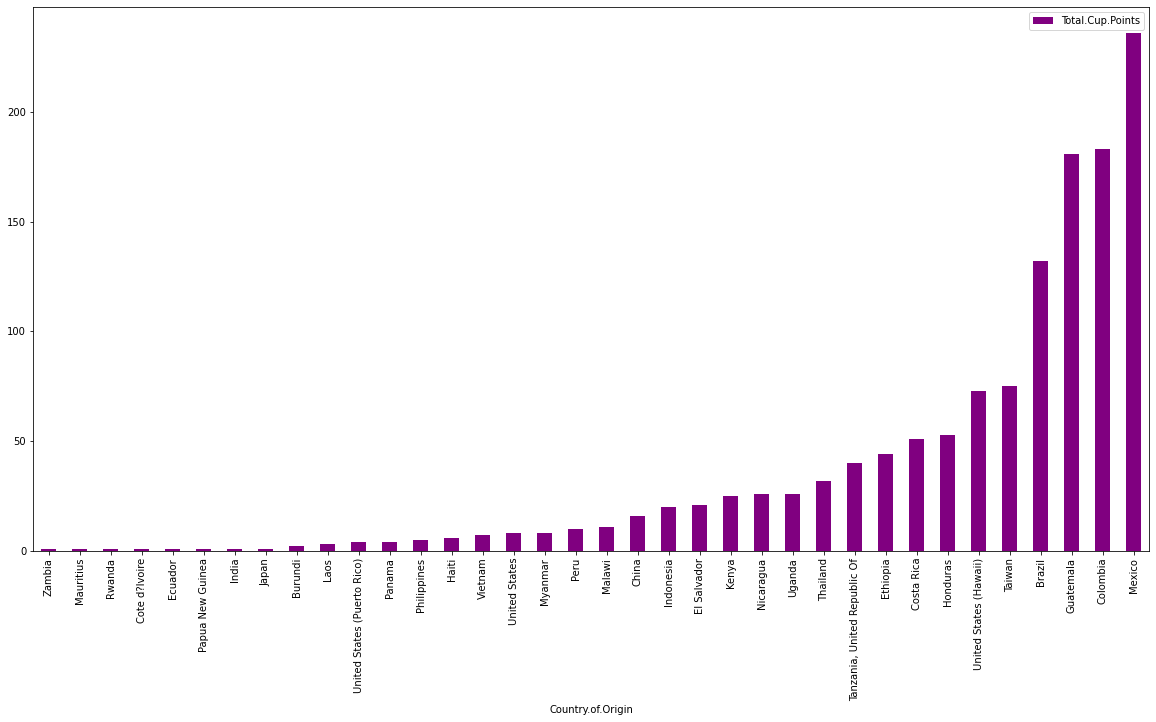

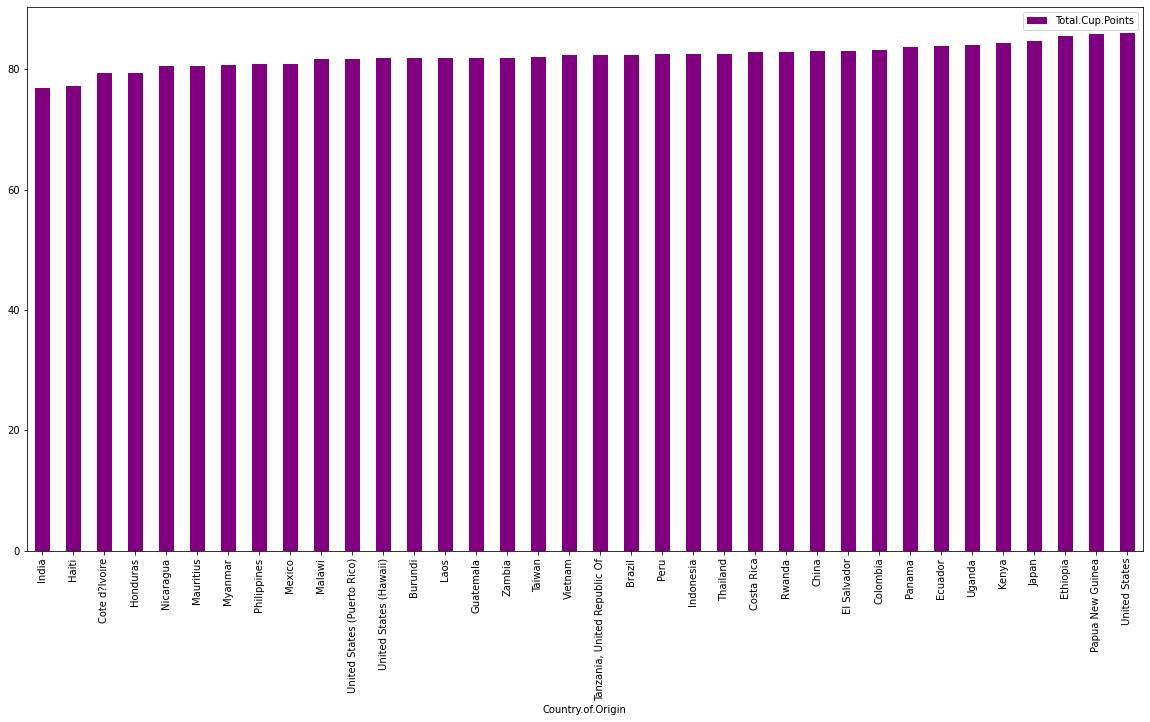

In [21]:
# plt.figure(figsize=(20,10))
# arabica_df.groupby(['Processing.Method','Country.of.Origin'])["Number.of.Bags"].count().plot(kind='bar',figsize=(20,10))


# Checking the average points grouping by country of origin
arabica_df[['Total.Cup.Points', 'Country.of.Origin']].groupby('Country.of.Origin').count().sort_values(by = 'Total.Cup.Points').plot.bar(color='purple',figsize=(20,10))

arabica_df[['Total.Cup.Points', 'Country.of.Origin']].groupby('Country.of.Origin').mean().sort_values(by = 'Total.Cup.Points').plot.bar(color='purple',figsize=(20,10))

# The majority of bags processed using Washed method followed by Natural / Dry and most comes from Mexico, followed by Guatemala, colombia and with Natural dry Brazil is the overall 4th.

# Most good quality coffee comes from colombia, followed by Guatemala and Mexico

The majority of coffee beans are mostly processed using a washed method.

**Quantitative data that determines Quality Measures**
1.   Aroma
2.   Flavor
3.   Aftertaste
4.   Acidity
5.   Body
6.   Balance
7.   Uniformity
8.   Cup Cleanliness
9.   Sweetness
10.   Moisture
11.   Defects


# Statistical Analysis

In [22]:
merged_df.head(5)

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [23]:
merged_df.describe()

,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1338.000000,1339.000000,1109.000000,1109.000000,1109.000000
mean,154.182972,7.566706,7.520426,7.401083,7.535706,7.517498,7.518013,9.834877,9.835108,9.856692,7.503376,82.089851,0.088379,0.479462,0.173393,3.556385,1750.713315,1799.347775,1775.030545
std,129.987162,0.377560,0.398442,0.404463,0.379827,0.370064,0.408943,0.554591,0.763946,0.616102,0.473464,3.500575,0.048287,2.549683,0.832121,5.312541,8669.440545,8668.805771,8668.626080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,14.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.080000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,175.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000,63.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


In [26]:
merged_dff = merged_df.drop_duplicates()
#no duplicate values the value before and after removing duplicate values remain same

In [27]:
merged_dff.describe()
# Quakers is the measure of coffee beans that don't turn dark brown when roasted

,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1338.000000,1339.000000,1109.000000,1109.000000,1109.000000
mean,154.182972,7.566706,7.520426,7.401083,7.535706,7.517498,7.518013,9.834877,9.835108,9.856692,7.503376,82.089851,0.088379,0.479462,0.173393,3.556385,1750.713315,1799.347775,1775.030545
std,129.987162,0.377560,0.398442,0.404463,0.379827,0.370064,0.408943,0.554591,0.763946,0.616102,0.473464,3.500575,0.048287,2.549683,0.832121,5.312541,8669.440545,8668.805771,8668.626080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,14.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.080000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,175.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000,63.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


#Assumptions:
Total cup points is the score based on the remaining columns
Here the minimum, maximum total cup points are 0 and 90.58% respectively. And the value 75% of data are below the score 83.67.

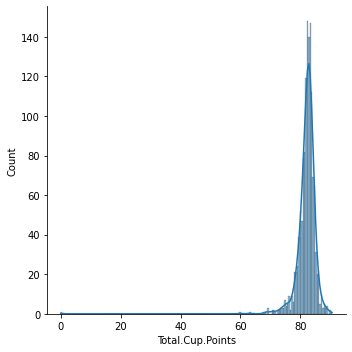

In [28]:
sn.displot( merged_df["Total.Cup.Points"], kde=True)

# this is the skewed dataset, which provides most of the data to be >70%

In [29]:
corrMatrix = merged_df.corr()

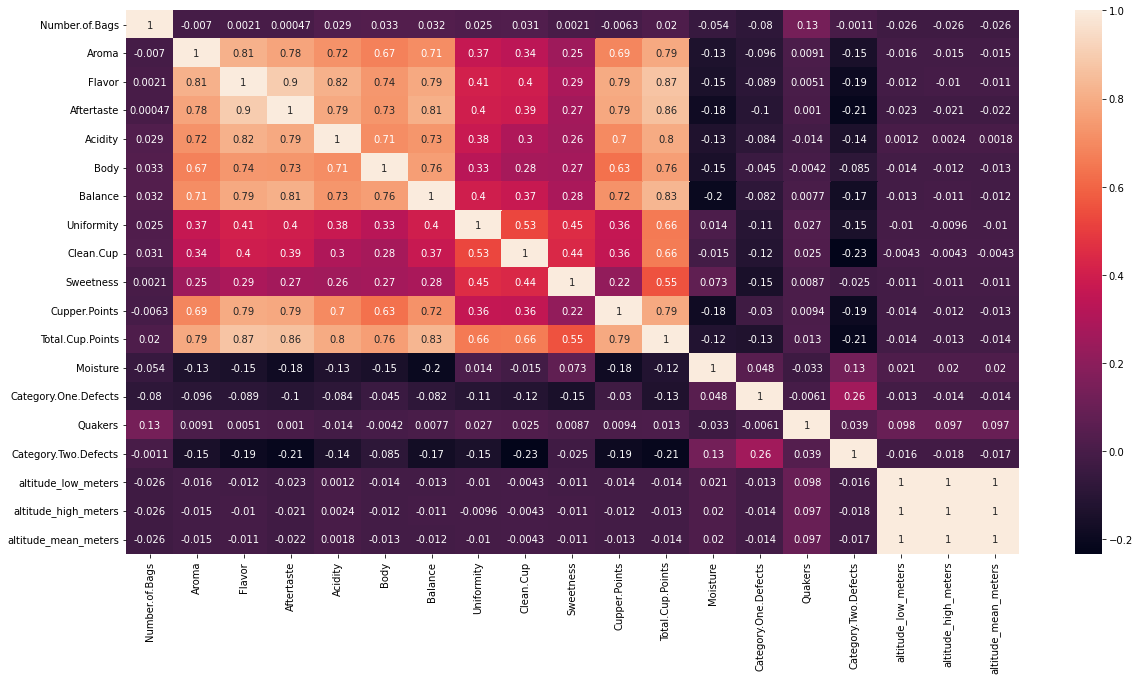

In [30]:
#corrMatrix.style.background_gradient(cmap="coolwarm")
plt.figure(figsize=(20,10))
sn.heatmap(corrMatrix, annot=True)
plt.show()

As per the heatMap, for the total.cup.points the parameters Flavor isnt required since, those are highly correlated, compared to others.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6b7255910>,
      dtype=object)

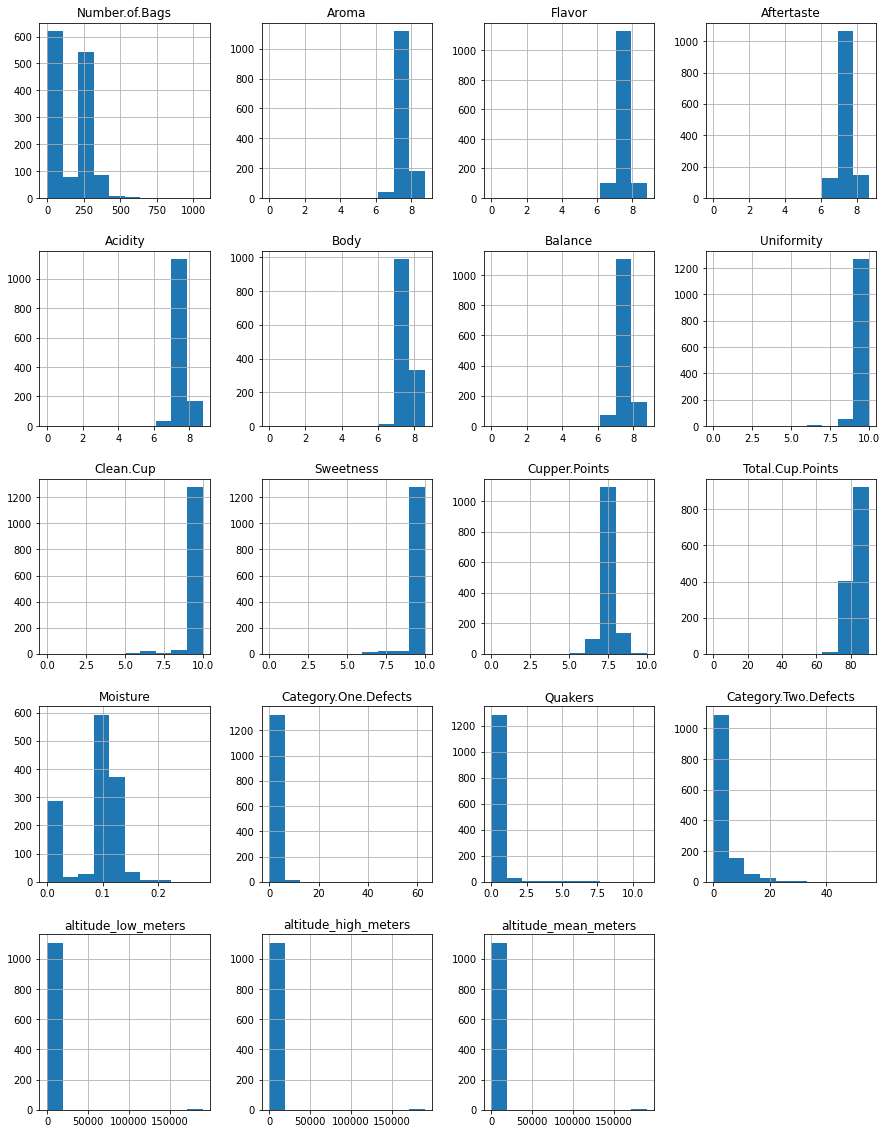

In [31]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
merged_df.hist(ax=ax)

##Multivariate Analysis

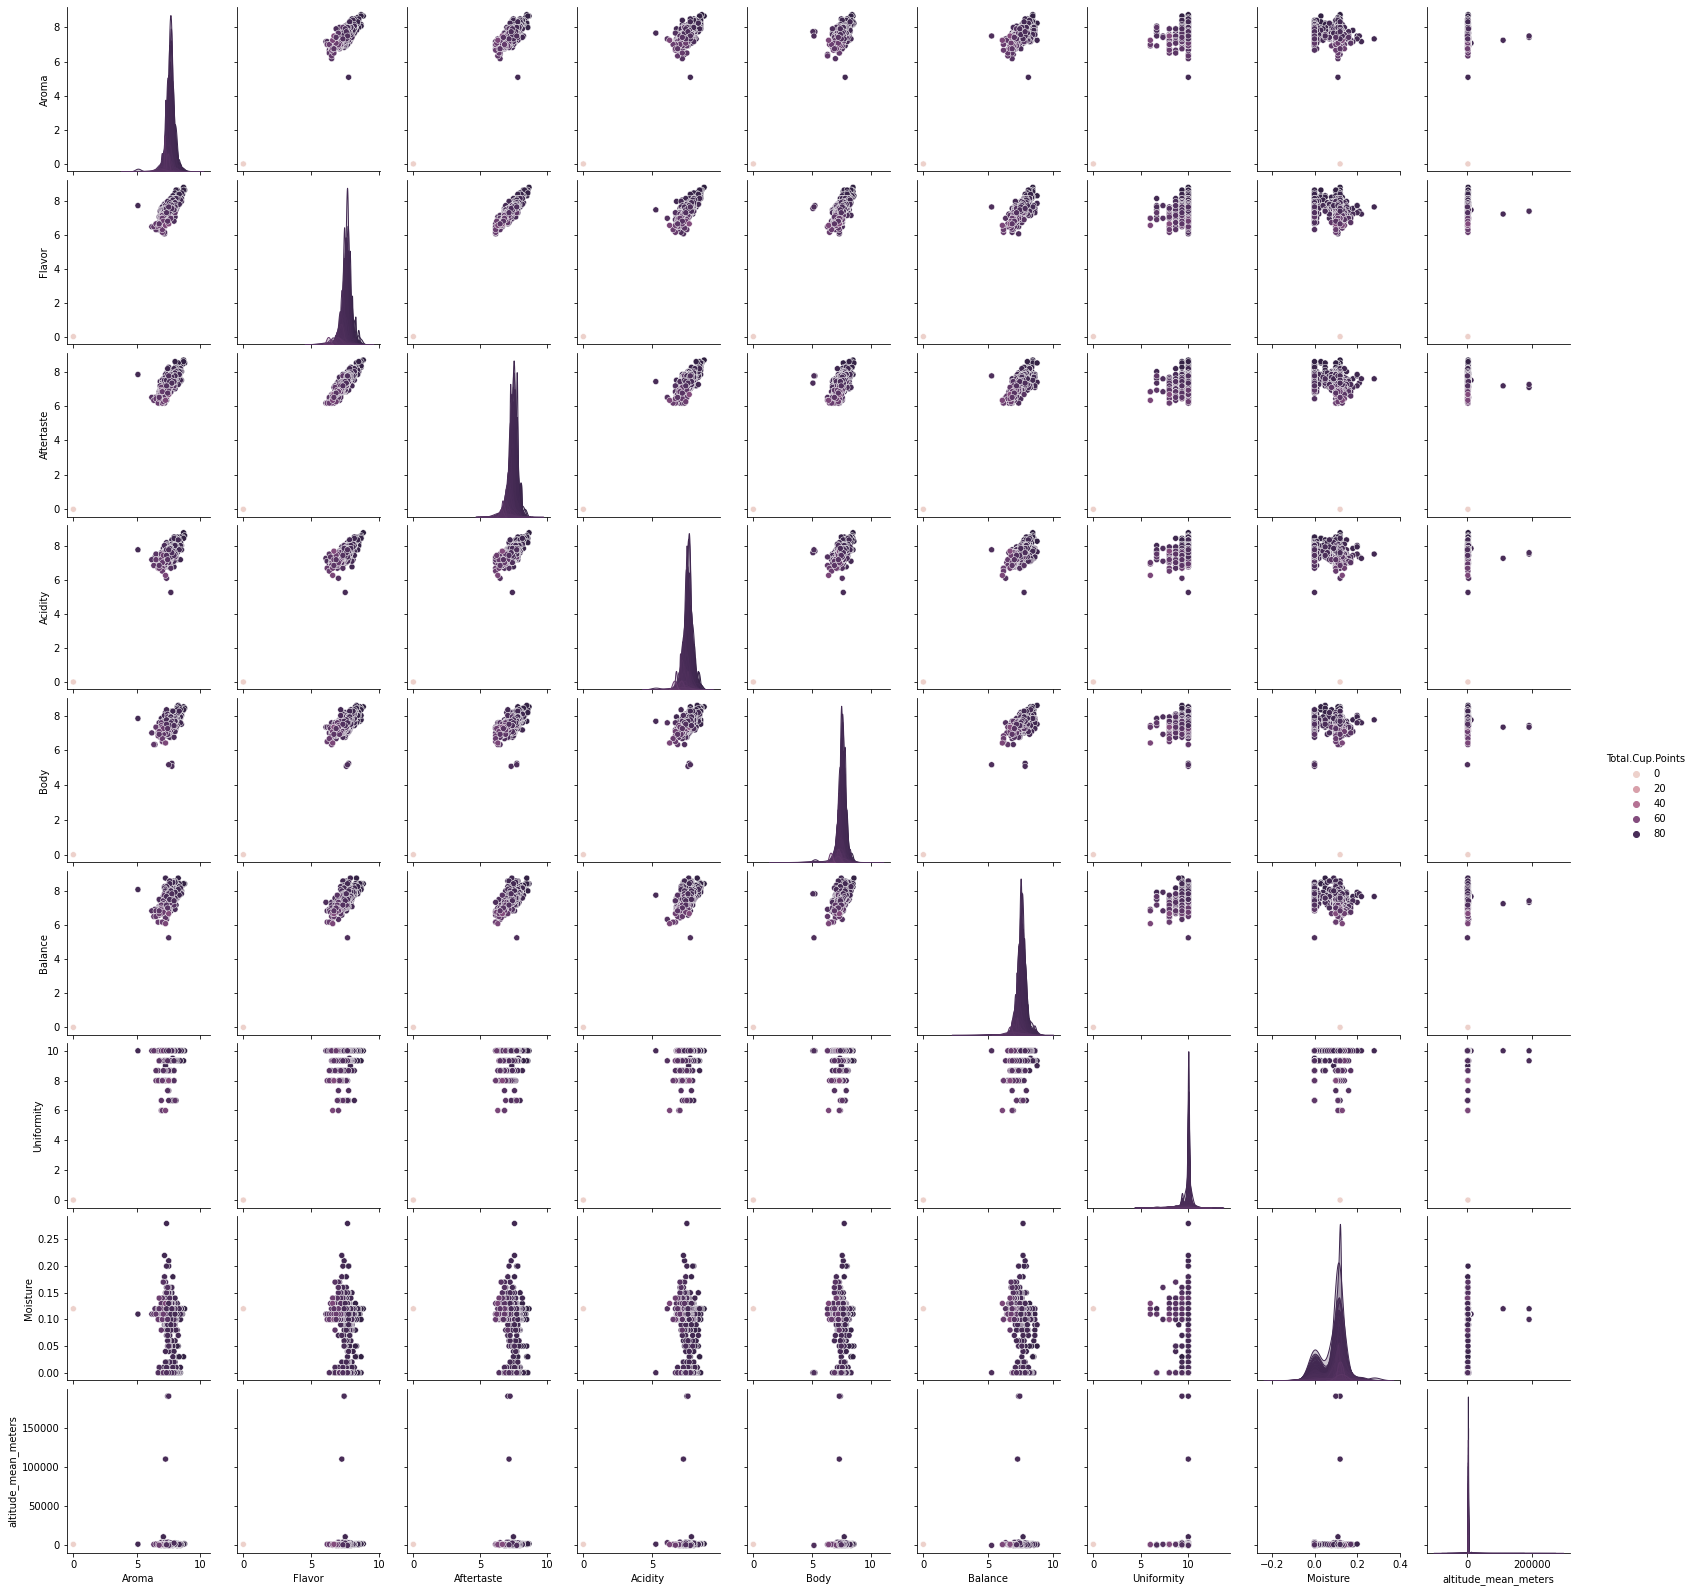

In [32]:
select_columns = ['Total.Cup.Points', 'Species','Country.of.Origin','Processing.Method', 'Aroma', 'Flavor', 'Aftertaste','Acidity','Body', 'Balance', 'Uniformity', 'Moisture', 'altitude_mean_meters']
sn.pairplot(merged_df[select_columns], hue="Total.Cup.Points")


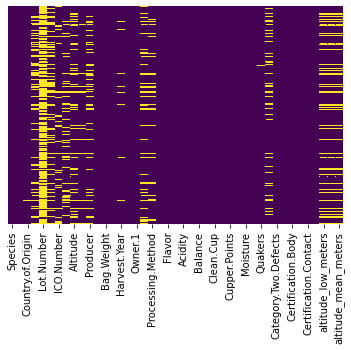

In [35]:
sn.heatmap(merged_df.isnull(),yticklabels=False,cbar=False, cmap="viridis")

In [36]:
# Finding the percentage of misssing vale in each column
percent_missing = merged_df.isnull().sum() * 100 / len(merged_df)
missing_value_df = pd.DataFrame({'column_name': merged_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Species,Species,0.000000
Owner,Owner,0.522778
Country.of.Origin,Country.of.Origin,0.074683
Farm.Name,Farm.Name,26.811053
Lot.Number,Lot.Number,79.387603
Mill,Mill,23.749066
ICO.Number,ICO.Number,11.725168
Company,Company,15.608663
Altitude,Altitude,16.878267
Region,Region,4.406273


# Remove the lot number as it has more than 70% values null 

In [37]:
merged_df=merged_df.dropna(subset=["Lot.Number"],axis=0)

In [38]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 18 to 1335
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                276 non-null    object 
 1   Owner                  276 non-null    object 
 2   Country.of.Origin      276 non-null    object 
 3   Farm.Name              223 non-null    object 
 4   Lot.Number             276 non-null    object 
 5   Mill                   275 non-null    object 
 6   ICO.Number             213 non-null    object 
 7   Company                276 non-null    object 
 8   Altitude               227 non-null    object 
 9   Region                 270 non-null    object 
 10  Producer               253 non-null    object 
 11  Number.of.Bags         276 non-null    int64  
 12  Bag.Weight             276 non-null    object 
 13  In.Country.Partner     276 non-null    object 
 14  Harvest.Year           266 non-null    object 
 15  Grad

# Predicting the quality of the coffee of Arabica dataset

In [39]:
arabica_df['Total.Cup.Points'].unique()

array([90.58, 89.92, 89.75, 89.  , 88.83, 88.75, 88.67, 88.42, 88.25,
       88.08, 87.92, 87.83, 87.58, 87.42, 87.33, 87.25, 87.17, 87.08,
       86.92, 86.83, 86.67, 86.58, 86.5 , 86.42, 86.33, 86.25, 86.17,
       86.08, 86.  , 85.92, 85.83, 85.75, 85.58, 85.5 , 85.42, 85.33,
       85.25, 85.17, 85.08, 85.  , 84.92, 84.83, 84.75, 84.67, 84.58,
       84.5 , 84.42, 84.33, 84.25, 84.17, 84.13, 84.08, 84.  , 83.92,
       83.83, 83.75, 83.67, 83.58, 83.5 , 83.42, 83.38, 83.33, 83.25,
       83.17, 83.08, 83.  , 82.92, 82.83, 82.75, 82.67, 82.58, 82.5 ,
       82.42, 82.33, 82.25, 82.17, 82.08, 82.  , 81.92, 81.83, 81.75,
       81.67, 81.58, 81.5 , 81.42, 81.33, 81.25, 81.17, 81.08, 81.  ,
       80.92, 80.83, 80.75, 80.67, 80.58, 80.5 , 80.42, 80.33, 80.25,
       80.17, 80.08, 80.  , 79.92, 79.83, 79.75, 79.67, 79.58, 79.5 ,
       79.42, 79.33, 79.25, 79.17, 79.08, 79.  , 78.92, 78.83, 78.75,
       78.67, 78.58, 78.5 , 78.42, 78.33, 78.25, 78.17, 78.08, 78.  ,
       77.92, 77.83,

In [40]:
arabica_df.describe()

,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1310.000000,1311.000000,1084.000000,1084.000000,1084.000000
mean,153.887872,7.563806,7.518070,7.397696,7.533112,7.517727,7.517506,9.833394,9.83312,9.903272,7.497864,82.115927,0.088863,0.426392,0.177099,3.591915,1759.548954,1808.843803,1784.196379
std,129.733734,0.378666,0.399979,0.405119,0.381599,0.359213,0.406316,0.559343,0.77135,0.530832,0.474610,3.515761,0.047957,1.832415,0.840583,5.350371,8767.847252,8767.187498,8767.016913
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,14.500000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.00000,10.000000,7.250000,81.170000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,175.000000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.00000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.00000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.00000,10.000000,10.000000,90.580000,0.280000,31.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


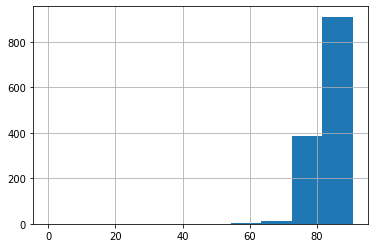

In [42]:
arabica_df['Total.Cup.Points'].hist()

In [181]:
arabica_qlty = arabica_df
# arabica_qlty['Total.Cup.Points'] = [1 if x>=82.115927 else 0 for x in arabica_qlty['Total.Cup.Points']]

In [44]:
arabica_qlty['Total.Cup.Points'].unique()

array([90.58, 89.92, 89.75, 89.  , 88.83, 88.75, 88.67, 88.42, 88.25,
       88.08, 87.92, 87.83, 87.58, 87.42, 87.33, 87.25, 87.17, 87.08,
       86.92, 86.83, 86.67, 86.58, 86.5 , 86.42, 86.33, 86.25, 86.17,
       86.08, 86.  , 85.92, 85.83, 85.75, 85.58, 85.5 , 85.42, 85.33,
       85.25, 85.17, 85.08, 85.  , 84.92, 84.83, 84.75, 84.67, 84.58,
       84.5 , 84.42, 84.33, 84.25, 84.17, 84.13, 84.08, 84.  , 83.92,
       83.83, 83.75, 83.67, 83.58, 83.5 , 83.42, 83.38, 83.33, 83.25,
       83.17, 83.08, 83.  , 82.92, 82.83, 82.75, 82.67, 82.58, 82.5 ,
       82.42, 82.33, 82.25, 82.17, 82.08, 82.  , 81.92, 81.83, 81.75,
       81.67, 81.58, 81.5 , 81.42, 81.33, 81.25, 81.17, 81.08, 81.  ,
       80.92, 80.83, 80.75, 80.67, 80.58, 80.5 , 80.42, 80.33, 80.25,
       80.17, 80.08, 80.  , 79.92, 79.83, 79.75, 79.67, 79.58, 79.5 ,
       79.42, 79.33, 79.25, 79.17, 79.08, 79.  , 78.92, 78.83, 78.75,
       78.67, 78.58, 78.5 , 78.42, 78.33, 78.25, 78.17, 78.08, 78.  ,
       77.92, 77.83,

Not Handling imbalanced


In [182]:
arabica_qlty= arabica_qlty[[ 'Country.of.Origin','Processing.Method', 'Moisture', 
     'unit_of_measurement','altitude_mean_meters', 'Total.Cup.Points','Aroma','Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 
             'Cupper.Points']]

arabica_qlty.columns= arabica_qlty.columns.str.replace('.', '_')

#arabica_qlty.columns= arabica_qlty.columns.str.lower()

In [46]:
arabica_qlty.head()

,Country_of_Origin,Processing_Method,Moisture,unit_of_measurement,altitude_mean_meters,Total_Cup_Points,Aroma,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points
0,Ethiopia,Washed / Wet,0.12,m,2075.0,90.58,8.67,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75
1,Ethiopia,Washed / Wet,0.12,m,2075.0,89.92,8.75,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58
2,Guatemala,NaN,0.00,m,1700.0,89.75,8.42,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25
3,Ethiopia,Natural / Dry,0.11,m,2000.0,89.00,8.17,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67
4,Ethiopia,Washed / Wet,0.12,m,2075.0,88.83,8.25,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58


In [47]:
arabica_qlty.isnull().sum().sort_values(ascending=False)

altitude_mean_meters    227
Processing_Method       152
Country_of_Origin         1
Moisture                  0
unit_of_measurement       0
Total_Cup_Points          0
Aroma                     0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean_Cup                 0
Sweetness                 0
Cupper_Points             0
dtype: int64

In [183]:
arabica_qlty["altitude_mean_meters"] = arabica_qlty["altitude_mean_meters"].fillna(arabica_qlty["altitude_mean_meters"].mode()[0]) 

arabica_qlty['Processing_Method'][arabica_qlty['Processing_Method'].isna()] = 'Unknown'

In [184]:
arabica_qlty.isnull().sum().sort_values(ascending=False)

Country_of_Origin       1
Processing_Method       0
Moisture                0
unit_of_measurement     0
altitude_mean_meters    0
Total_Cup_Points        0
Aroma                   0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean_Cup               0
Sweetness               0
Cupper_Points           0
dtype: int64

In [185]:
arabica_qlty['Country_of_Origin'][arabica_qlty['Country_of_Origin'].isna()] = 'Unknown'
arabica_qlty['Country_of_Origin'][arabica_qlty['Country_of_Origin'] == 'Nicaragua']

arabica_qlty['Processing_Method'][arabica_qlty['Processing_Method'] == 'Unknown'] = 'Other'

arabica_qlty['Country_of_Origin'][arabica_qlty['Country_of_Origin'] == 'Tanzania, United Republic Of'] = 'Tanzania'
arabica_qlty['Country_of_Origin'][arabica_qlty['Country_of_Origin'] == 'Cote d?Ivoire'] = "Cote d'Ivoire"
arabica_qlty['altitude_mean_meters'][arabica_qlty['altitude_mean_meters'] == 11000] = 1100


In [186]:
arabica_qlty[arabica_qlty['altitude_mean_meters']>2000]

,Country_of_Origin,Processing_Method,Moisture,unit_of_measurement,altitude_mean_meters,Total_Cup_Points,Aroma,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points
0,Ethiopia,Washed / Wet,0.12,m,2075.0,90.58,8.67,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75
1,Ethiopia,Washed / Wet,0.12,m,2075.0,89.92,8.75,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58
4,Ethiopia,Washed / Wet,0.12,m,2075.0,88.83,8.25,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58
15,United States,Washed / Wet,0.00,m,2080.0,87.58,8.00,8.58,8.17,8.17,8.00,10.00,10.00,10.00,8.17
20,United States,Washed / Wet,0.00,m,2019.0,87.25,8.00,8.08,8.50,8.25,8.00,10.00,10.00,10.00,8.17
23,United States,Washed / Wet,0.00,m,2112.0,87.08,8.25,8.17,8.17,7.83,8.17,10.00,10.00,10.00,8.17
89,Colombia,Natural / Dry,0.00,m,2560.0,85.08,8.17,7.58,8.08,8.00,7.75,10.00,10.00,10.00,7.67
92,Colombia,Natural / Dry,0.11,m,2136.0,85.08,7.83,7.75,7.75,7.83,7.83,10.00,10.00,10.00,8.08
193,Colombia,Natural / Dry,0.11,m,2560.0,84.25,7.83,7.75,7.58,7.67,8.00,10.00,10.00,10.00,7.83
215,Guatemala,Washed / Wet,0.10,m,3280.0,84.17,7.58,7.58,7.83,7.83,7.67,10.00,10.00,10.00,7.83


In [187]:
# Checking the average points grouping by country of origin
arabica_qlty[['Total_Cup_Points', 'Country_of_Origin']].groupby('Country_of_Origin').mean().sort_values(by = 'Total_Cup_Points', 
                                                                                              ascending =False)

,Total_Cup_Points
Country_of_Origin,
United States,85.978750
Papua New Guinea,85.750000
Ethiopia,85.484091
Japan,84.670000
Kenya,84.309600
Uganda,84.051923
Ecuador,83.830000
Panama,83.707500
Colombia,83.106557


In [188]:
arabica_qlty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country_of_Origin     1311 non-null   object 
 1   Processing_Method     1311 non-null   object 
 2   Moisture              1311 non-null   float64
 3   unit_of_measurement   1311 non-null   object 
 4   altitude_mean_meters  1311 non-null   float64
 5   Total_Cup_Points      1311 non-null   float64
 6   Aroma                 1311 non-null   float64
 7   Aftertaste            1311 non-null   float64
 8   Acidity               1311 non-null   float64
 9   Body                  1311 non-null   float64
 10  Balance               1311 non-null   float64
 11  Uniformity            1311 non-null   float64
 12  Clean_Cup             1311 non-null   float64
 13  Sweetness             1311 non-null   float64
 14  Cupper_Points         1311 non-null   float64
dtypes: float64(12), objec

In [189]:
mask = arabica_qlty['unit_of_measurement'].eq('feet')
arabica_qlty.loc[mask, ['altitude_mean_meters']] /= 3.281

arabica_qlty= arabica_qlty.drop(columns= "unit_of_measurement")

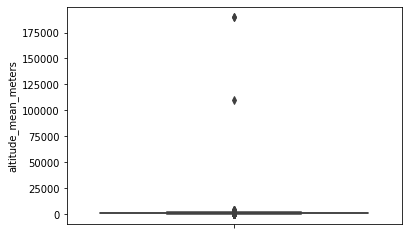

In [190]:
# drop outliers in altitude column

sn.boxplot(data= arabica_qlty, y= "altitude_mean_meters")

plt.show()

In [191]:
# drop altitude with more than 3 SD

arabica_qlty= arabica_qlty[~(np.abs(stats.zscore(arabica_qlty["altitude_mean_meters"])) > 3)]

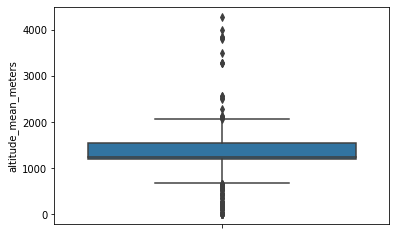

In [192]:
# drop rows with altitude > 10000, because it is impossible 

arabica_qlty= arabica_qlty[~(arabica_qlty["altitude_mean_meters"] > 10000)]
sn.boxplot(data= arabica_qlty, y= "altitude_mean_meters")

plt.show()

In [193]:
arabica_qlty = pd.get_dummies(arabica_qlty, columns = ['Processing_Method','Country_of_Origin']
                    ,drop_first=True)
arabica_qlty.head()

,Moisture,altitude_mean_meters,Total_Cup_Points,Aroma,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,Processing_Method_Other,Processing_Method_Pulped natural / honey,Processing_Method_Semi-washed / Semi-pulped,Processing_Method_Washed / Wet,Country_of_Origin_Burundi,Country_of_Origin_China,Country_of_Origin_Colombia,Country_of_Origin_Costa Rica,Country_of_Origin_Cote d'Ivoire,Country_of_Origin_Ecuador,Country_of_Origin_El Salvador,Country_of_Origin_Ethiopia,Country_of_Origin_Guatemala,Country_of_Origin_Haiti,Country_of_Origin_Honduras,Country_of_Origin_India,Country_of_Origin_Indonesia,Country_of_Origin_Japan,Country_of_Origin_Kenya,Country_of_Origin_Laos,Country_of_Origin_Malawi,Country_of_Origin_Mauritius,Country_of_Origin_Mexico,Country_of_Origin_Myanmar,Country_of_Origin_Nicaragua,Country_of_Origin_Panama,Country_of_Origin_Papua New Guinea,Country_of_Origin_Peru,Country_of_Origin_Philippines,Country_of_Origin_Rwanda,Country_of_Origin_Taiwan,Country_of_Origin_Tanzania,Country_of_Origin_Thailand,Country_of_Origin_Uganda,Country_of_Origin_United States,Country_of_Origin_United States (Hawaii),Country_of_Origin_United States (Puerto Rico),Country_of_Origin_Unknown,Country_of_Origin_Vietnam,Country_of_Origin_Zambia
0,0.12,2075.0,90.58,8.67,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.12,2075.0,89.92,8.75,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.00,1700.0,89.75,8.42,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.11,2000.0,89.00,8.17,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.12,2075.0,88.83,8.25,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Feature Matrix in X and Target in Y


In [59]:
X = arabica_qlty.drop('Total_Cup_Points',axis=1)
y = arabica_qlty['Total_Cup_Points']

Splitting The Dataset Into The Training Set And Test Set

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

Feature Scaling

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

st  = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)


In [62]:
X_train

array([[-1.81515277, -1.17190496,  0.26906401, ...,  0.        ,
        -0.07595545, -0.03093441],
       [ 0.4574422 , -0.48445313, -1.22594063, ...,  0.        ,
        -0.07595545, -0.03093441],
       [ 0.25084266, -0.21405541,  0.26906401, ...,  0.        ,
        -0.07595545, -0.03093441],
       ...,
       [-0.16235643, -0.66777362, -1.63136562, ...,  0.        ,
        -0.07595545, -0.03093441],
       [ 0.66404174, -0.6219435 , -1.42865313, ...,  0.        ,
        13.16561177, -0.03093441],
       [ 0.4574422 , -0.48445313, -1.22594063, ...,  0.        ,
        -0.07595545, -0.03093441]])

In [63]:
from sklearn.decomposition import PCA

In [64]:
pca = PCA(n_components=0.90)

In [65]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [66]:
pca.explained_variance_ratio_

array([0.11918208, 0.04605042, 0.03609668, 0.03082388, 0.0279555 ,
       0.02725962, 0.02546974, 0.02393107, 0.02304077, 0.02256933,
       0.02204003, 0.02174329, 0.0216307 , 0.02154834, 0.02145588,
       0.0213832 , 0.02133401, 0.02128642, 0.02120032, 0.02112975,
       0.02107687, 0.02105808, 0.02101658, 0.02098372, 0.02097579,
       0.02092344, 0.02091027, 0.02089297, 0.02088893, 0.02087864,
       0.02086344, 0.02086309, 0.01948042, 0.01896293, 0.01583394])

Measuring Values

In [67]:
def train_test_evaluate(model_name, model, X_train, y_train, X_test, y_test):  

    model.fit(X_train, y_train)
    
    y_pred= model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    y_test_mean= y_test.mean()
    mae_ratio= mae/y_test_mean
    rmse_ratio= rmse/y_test_mean
    
    result_df = pd.DataFrame(
        data=[[model_name, mae, mse, rmse, r2, mae_ratio, rmse_ratio]], 
        columns=["Model", 'MAE', 'MSE', 'RMSE', 'R2 Score', "MAE Ratio", "RMSE Ratio"])
    return result_df

In [68]:
def test_evaluate_hyperparameter(model_name, model, X_test, y_test, y_train):  

    y_pred= model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    y_test_mean= y_test.mean()
    mae_ratio= mae/y_test_mean
    rmse_ratio= rmse/y_test_mean
    
    result_df = pd.DataFrame(
        data=[[model_name, mae, mse, rmse, r2, mae_ratio, rmse_ratio]], 
        columns=["Model", 'MAE', 'MSE', 'RMSE', 'R2 Score', "MAE Ratio", "RMSE Ratio"])
    
    return result_df

SVR

In [69]:
from sklearn.svm import SVR
svr_model= SVR()

result_df= train_test_evaluate("SVR", svr_model, X_train, y_train, X_test, y_test)

result_df

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio
0,SVR,0.466825,2.160543,1.469879,0.733062,0.005686,0.017904


Random Forest

In [70]:
rf_model= RandomForestRegressor()

result_df_2= train_test_evaluate("Random Forest", rf_model, X_train, y_train, X_test, y_test)
result_df = result_df.append(result_df_2, ignore_index=True)
result_df= result_df.sort_values("RMSE Ratio", ignore_index= True)
result_df

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio
0,Random Forest,0.316077,0.363327,0.602766,0.955110,0.003850,0.007342
1,SVR,0.466825,2.160543,1.469879,0.733062,0.005686,0.017904


Adaboost

In [71]:
ada_model= AdaBoostRegressor()

result_df_2= train_test_evaluate("Adaboost", ada_model,  X_train, y_train, X_test, y_test)
result_df = result_df.append(result_df_2, ignore_index=True)
result_df= result_df.sort_values("RMSE Ratio", ignore_index= True)
result_df

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio
0,Random Forest,0.316077,0.363327,0.602766,0.955110,0.003850,0.007342
1,Adaboost,0.702627,0.861685,0.928270,0.893538,0.008558,0.011307
2,SVR,0.466825,2.160543,1.469879,0.733062,0.005686,0.017904


Gradient Boosting

In [72]:
gb_model= GradientBoostingRegressor()

result_df_2= train_test_evaluate("Gradient Boosting", gb_model, X_train, y_train, X_test, y_test)
result_df = result_df.append(result_df_2, ignore_index=True)
result_df= result_df.sort_values("RMSE Ratio", ignore_index= True)
result_df

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio
0,Random Forest,0.316077,0.363327,0.602766,0.955110,0.003850,0.007342
1,Gradient Boosting,0.268887,0.463868,0.681079,0.942688,0.003275,0.008296
2,Adaboost,0.702627,0.861685,0.928270,0.893538,0.008558,0.011307
3,SVR,0.466825,2.160543,1.469879,0.733062,0.005686,0.017904


Decision Tree

In [73]:
dt_model= DecisionTreeRegressor()

result_df_2= train_test_evaluate("Decision Tree", dt_model, X_train, y_train, X_test, y_test)
result_df = result_df.append(result_df_2, ignore_index=True)
result_df= result_df.sort_values("RMSE Ratio", ignore_index= True)
result_df

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio
0,Random Forest,0.316077,0.363327,0.602766,0.955110,0.003850,0.007342
1,Gradient Boosting,0.268887,0.463868,0.681079,0.942688,0.003275,0.008296
2,Decision Tree,0.402977,0.645865,0.803657,0.920203,0.004908,0.009789
3,Adaboost,0.702627,0.861685,0.928270,0.893538,0.008558,0.011307
4,SVR,0.466825,2.160543,1.469879,0.733062,0.005686,0.017904


KNN

In [74]:
knn_model= KNeighborsRegressor()

result_df_2= train_test_evaluate("KNN", knn_model,  X_train, y_train, X_test, y_test)
result_df = result_df.append(result_df_2, ignore_index=True)
result_df= result_df.sort_values("RMSE Ratio", ignore_index= True)
result_df

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio
0,Random Forest,0.316077,0.363327,0.602766,0.955110,0.003850,0.007342
1,Gradient Boosting,0.268887,0.463868,0.681079,0.942688,0.003275,0.008296
2,Decision Tree,0.402977,0.645865,0.803657,0.920203,0.004908,0.009789
3,Adaboost,0.702627,0.861685,0.928270,0.893538,0.008558,0.011307
4,KNN,0.649672,1.610269,1.268964,0.801049,0.007913,0.015456
5,SVR,0.466825,2.160543,1.469879,0.733062,0.005686,0.017904


HyperParameter Tuning

In [75]:
rf_model= RandomForestRegressor()

param_grid= {
    "n_estimators": list(range(80, 160, 20)),
    "max_depth": list(range(2, 11, 2)),
    "min_samples_leaf": list(range(1, 3)),
    "random_state": [8]
}

grid_model= GridSearchCV(estimator= rf_model, param_grid= param_grid)

grid_model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [80, 100, 120, 140],
                         'random_state': [8]})

In [76]:
grid_model.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'n_estimators': 140,
 'random_state': 8}

In [77]:
result_df_2= test_evaluate_hyperparameter("Random Forest Tuned 1", grid_model, X_test, y_test, y_train)
result_df = result_df.append(result_df_2, ignore_index=True)
result_df= result_df.sort_values("RMSE Ratio", ignore_index= True)
result_df

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio
0,Random Forest Tuned 1,0.314200,0.354308,0.595238,0.956225,0.003827,0.007250
1,Random Forest,0.316077,0.363327,0.602766,0.955110,0.003850,0.007342
2,Gradient Boosting,0.268887,0.463868,0.681079,0.942688,0.003275,0.008296
3,Decision Tree,0.402977,0.645865,0.803657,0.920203,0.004908,0.009789
4,Adaboost,0.702627,0.861685,0.928270,0.893538,0.008558,0.011307
5,KNN,0.649672,1.610269,1.268964,0.801049,0.007913,0.015456
6,SVR,0.466825,2.160543,1.469879,0.733062,0.005686,0.017904


In [78]:
rf_model= RandomForestRegressor()

param_grid= {
    "n_estimators": list(range(130, 160, 10)),
    "max_depth": list(range(10, 20, 2)),
    "min_samples_leaf": list(range(2, 7, 2)),
    "random_state": [8]
}

grid_model= GridSearchCV(estimator= rf_model, param_grid= param_grid)

grid_model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 12, 14, 16, 18],
                         'min_samples_leaf': [2, 4, 6],
                         'n_estimators': [130, 140, 150], 'random_state': [8]})

In [79]:
grid_model.best_params_

{'max_depth': 16,
 'min_samples_leaf': 4,
 'n_estimators': 150,
 'random_state': 8}

In [80]:
result_df_2= test_evaluate_hyperparameter("Random Forest Tuned 2", grid_model, X_test, y_test, y_train)
result_df = result_df.append(result_df_2, ignore_index=True)
result_df= result_df.sort_values("RMSE Ratio", ignore_index= True)
result_df

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio
0,Random Forest Tuned 1,0.314200,0.354308,0.595238,0.956225,0.003827,0.007250
1,Random Forest,0.316077,0.363327,0.602766,0.955110,0.003850,0.007342
2,Gradient Boosting,0.268887,0.463868,0.681079,0.942688,0.003275,0.008296
3,Decision Tree,0.402977,0.645865,0.803657,0.920203,0.004908,0.009789
4,Adaboost,0.702627,0.861685,0.928270,0.893538,0.008558,0.011307
5,Random Forest Tuned 2,0.424097,1.484311,1.218323,0.816611,0.005166,0.014840
6,KNN,0.649672,1.610269,1.268964,0.801049,0.007913,0.015456
7,SVR,0.466825,2.160543,1.469879,0.733062,0.005686,0.017904


Prediction

In [107]:
rf_model= RandomForestRegressor(
    max_depth= 10,
    min_samples_leaf= 2,
    n_estimators= 140,
    random_state= 8)
rf_model.fit(X_train, y_train)

y_pred= rf_model.predict(X_test)

In [108]:
prediction_df= pd.DataFrame(data= [y_test.values, y_pred])

prediction_df= prediction_df.transpose()
prediction_df.columns= ["y_true", "y_pred"]
prediction_df= prediction_df.round(2)
prediction_df["diff"]= prediction_df["y_true"] - prediction_df["y_pred"]
prediction_df.head()

,y_true,y_pred,diff
0,80.92,81.37,-0.45
1,80.67,81.46,-0.79
2,82.42,82.43,-0.01
3,82.25,82.32,-0.07
4,82.33,82.32,0.01


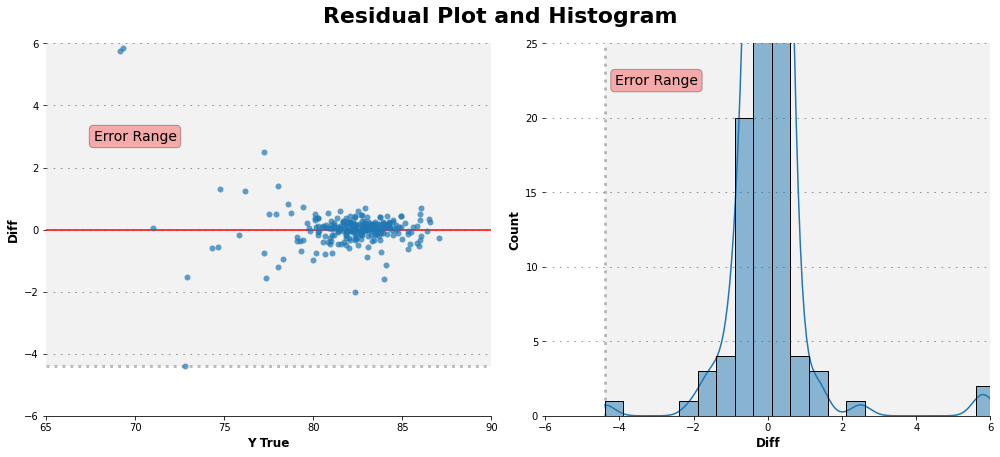

In [109]:
fig, ax = plt.subplots(ncols=2, figsize= (14, 6))

sn.scatterplot(data= prediction_df, x= "y_true", y= "diff",linewidth=0, alpha = 0.7, ax= ax[0], zorder= 5)
ax[0].set_xlim(65, 90)
ax[0].set_ylim(-6, 6)
ax[0].axhline(y= 0, color= "red")

ax[0].axhline(prediction_df["diff"].min(), linestyle= ":", linewidth= 3, color= "grey", alpha=0.5)
ax[0].axhline(prediction_df["diff"].max(), linestyle= ":", linewidth= 3, color= "grey", alpha=0.5)
ax[0].axhspan(prediction_df["diff"].min(), prediction_df["diff"].max(), facecolor='grey', alpha=0.1, zorder= 0)
ax[0].text(x= 70, y= 3, s= "Error Range", color='black', ha="center", va="center", fontstretch= "normal",
           alpha= 1, fontsize= 14, bbox= dict(facecolor='red', alpha= 0.3, boxstyle="round"))

sn.histplot(data= prediction_df, x= "diff", binwidth=0.5, kde= True, ax= ax[1], zorder= 5)
ax[1].set_xlim(-6, 6)
ax[1].set_ylim(0, 25)
ax[1].set_yticks(list(range(0, 30, 5)))

ax[1].axvline(prediction_df["diff"].min(), linestyle= ":", linewidth= 3, color= "grey", alpha=0.5)
ax[1].axvline(prediction_df["diff"].max(), linestyle= ":", linewidth= 3, color= "grey", alpha=0.5)
ax[1].axvspan(prediction_df["diff"].min(), prediction_df["diff"].max(), facecolor='grey', alpha=0.1, zorder= 0)
ax[1].text(x= -3, y= 22.5, s= "Error Range", color='black', ha="center", va="center", fontstretch= "normal",
           alpha= 1, fontsize= 14, bbox= dict(facecolor='red', alpha= 0.3, boxstyle="round"))

plt.suptitle("Residual Plot and Histogram", fontsize= 22, fontweight= "bold", y= 1.05)

for i in [0, 1]:
    ax[i].set_ylabel(ax[i].yaxis.get_label().get_text().title().replace("_", " "), fontsize= 12, fontweight= "bold")
    ax[i].set_xlabel(ax[i].xaxis.get_label().get_text().title().replace("_", " "), fontsize= 12, fontweight= "bold")
    ax[i].grid(axis='y', color='black', linestyle=':', dashes=(2,7), alpha= 0.5, zorder= 0)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    
plt.tight_layout()
plt.show()

In [110]:
import joblib

In [111]:
joblib.dump(rf_model, 'coffee_quality_prediction')

['coffee_quality_prediction']

In [112]:
model = joblib.load('coffee_quality_prediction')

In [113]:
arabica_qlty.head(1)

,Moisture,altitude_mean_meters,Total_Cup_Points,Aroma,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,Processing_Method_Other,Processing_Method_Pulped natural / honey,Processing_Method_Semi-washed / Semi-pulped,Processing_Method_Washed / Wet,Country_of_Origin_Burundi,Country_of_Origin_China,Country_of_Origin_Colombia,Country_of_Origin_Costa Rica,Country_of_Origin_Cote d'Ivoire,Country_of_Origin_Ecuador,Country_of_Origin_El Salvador,Country_of_Origin_Ethiopia,Country_of_Origin_Guatemala,Country_of_Origin_Haiti,Country_of_Origin_Honduras,Country_of_Origin_India,Country_of_Origin_Indonesia,Country_of_Origin_Japan,Country_of_Origin_Kenya,Country_of_Origin_Laos,Country_of_Origin_Malawi,Country_of_Origin_Mauritius,Country_of_Origin_Mexico,Country_of_Origin_Myanmar,Country_of_Origin_Nicaragua,Country_of_Origin_Panama,Country_of_Origin_Papua New Guinea,Country_of_Origin_Peru,Country_of_Origin_Philippines,Country_of_Origin_Rwanda,Country_of_Origin_Taiwan,Country_of_Origin_Tanzania,Country_of_Origin_Thailand,Country_of_Origin_Uganda,Country_of_Origin_United States,Country_of_Origin_United States (Hawaii),Country_of_Origin_United States (Puerto Rico),Country_of_Origin_Unknown,Country_of_Origin_Vietnam,Country_of_Origin_Zambia
0,0.12,2075.0,90.58,8.67,8.67,8.75,8.5,8.42,10.0,10.0,10.0,8.75,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [114]:
new_data = arabica_qlty.head(1)

In [115]:
new_data.drop("Total_Cup_Points", axis=1, inplace=True)

In [116]:
new_data.head()

,Moisture,altitude_mean_meters,Aroma,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,Processing_Method_Other,Processing_Method_Pulped natural / honey,Processing_Method_Semi-washed / Semi-pulped,Processing_Method_Washed / Wet,Country_of_Origin_Burundi,Country_of_Origin_China,Country_of_Origin_Colombia,Country_of_Origin_Costa Rica,Country_of_Origin_Cote d'Ivoire,Country_of_Origin_Ecuador,Country_of_Origin_El Salvador,Country_of_Origin_Ethiopia,Country_of_Origin_Guatemala,Country_of_Origin_Haiti,Country_of_Origin_Honduras,Country_of_Origin_India,Country_of_Origin_Indonesia,Country_of_Origin_Japan,Country_of_Origin_Kenya,Country_of_Origin_Laos,Country_of_Origin_Malawi,Country_of_Origin_Mauritius,Country_of_Origin_Mexico,Country_of_Origin_Myanmar,Country_of_Origin_Nicaragua,Country_of_Origin_Panama,Country_of_Origin_Papua New Guinea,Country_of_Origin_Peru,Country_of_Origin_Philippines,Country_of_Origin_Rwanda,Country_of_Origin_Taiwan,Country_of_Origin_Tanzania,Country_of_Origin_Thailand,Country_of_Origin_Uganda,Country_of_Origin_United States,Country_of_Origin_United States (Hawaii),Country_of_Origin_United States (Puerto Rico),Country_of_Origin_Unknown,Country_of_Origin_Vietnam,Country_of_Origin_Zambia
0,0.12,2075.0,8.67,8.67,8.75,8.5,8.42,10.0,10.0,10.0,8.75,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [117]:
prediction_test = pca.transform(st.transform(new_data))

In [118]:
cup_score = model.predict(prediction_test)

In [119]:
cup_score

array([89.67238784])

In [120]:
new_data["Moisture"] = 0.89
new_data["Aftertaste"] = 6.7
new_data["Uniformity"] = 5
new_data["Cupper_Points"] =5


In [121]:
new_data.head()

,Moisture,altitude_mean_meters,Aroma,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,Processing_Method_Other,Processing_Method_Pulped natural / honey,Processing_Method_Semi-washed / Semi-pulped,Processing_Method_Washed / Wet,Country_of_Origin_Burundi,Country_of_Origin_China,Country_of_Origin_Colombia,Country_of_Origin_Costa Rica,Country_of_Origin_Cote d'Ivoire,Country_of_Origin_Ecuador,Country_of_Origin_El Salvador,Country_of_Origin_Ethiopia,Country_of_Origin_Guatemala,Country_of_Origin_Haiti,Country_of_Origin_Honduras,Country_of_Origin_India,Country_of_Origin_Indonesia,Country_of_Origin_Japan,Country_of_Origin_Kenya,Country_of_Origin_Laos,Country_of_Origin_Malawi,Country_of_Origin_Mauritius,Country_of_Origin_Mexico,Country_of_Origin_Myanmar,Country_of_Origin_Nicaragua,Country_of_Origin_Panama,Country_of_Origin_Papua New Guinea,Country_of_Origin_Peru,Country_of_Origin_Philippines,Country_of_Origin_Rwanda,Country_of_Origin_Taiwan,Country_of_Origin_Tanzania,Country_of_Origin_Thailand,Country_of_Origin_Uganda,Country_of_Origin_United States,Country_of_Origin_United States (Hawaii),Country_of_Origin_United States (Puerto Rico),Country_of_Origin_Unknown,Country_of_Origin_Vietnam,Country_of_Origin_Zambia
0,0.89,2075.0,8.67,6.7,8.75,8.5,8.42,5,10.0,10.0,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [122]:
prediction_test = pca.transform(st.transform(new_data))

In [123]:
cup_score = model.predict(prediction_test)

In [124]:
cup_score

array([78.8703581])

##**Based on the qualitative characteristics provided we can predict the taste profile of a coffee. Also the cup score based on the mean here any value above 82.115927 can be scored as good and other values as bad.**

# Clustering

In [145]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [148]:
def get_labels(data, centroids):
    # Find eucleidan distance
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [151]:
def new_centroids(data, labels, k):
    # calculate geometric mean
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [152]:
from IPython.display import clear_output

In [210]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(arabica_qlty)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    # plt.legend()
    plt.show()

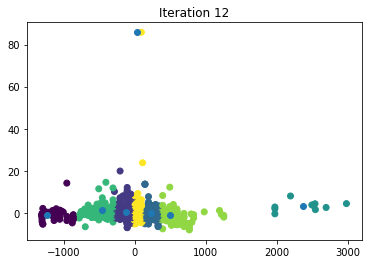

In [211]:
max_iterations = 100
centroid_count = 7

centroids = random_centroids(arabica_qlty, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(arabica_qlty, centroids)
    centroids = new_centroids(arabica_qlty, labels, centroid_count)
    plot_clusters(arabica_qlty, labels, centroids, iteration)
    iteration += 1

In [212]:
centroids

,0,1,2,3,4,5,6
Moisture,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
altitude_mean_meters,66.034156,1185.836813,1541.757132,3680.258903,848.572152,1807.786924,1344.964807
Total_Cup_Points,82.215498,81.723359,82.413301,80.892318,81.625958,83.461949,0.000000
Aroma,7.526600,7.520607,7.587107,7.322515,7.501912,7.702603,0.000000
Aftertaste,7.396836,7.362968,7.409177,7.168725,7.356704,7.559775,0.000000
Acidity,7.428170,7.515712,7.554137,7.293758,7.452165,7.667535,0.000000
Body,7.520674,7.517127,7.516448,7.429807,7.461654,7.621360,0.000000
Balance,7.528115,7.494675,7.532490,7.181620,7.411147,7.675558,0.000000
Uniformity,9.900009,9.727447,9.874771,9.930890,9.832520,9.946941,0.000000
Clean_Cup,9.905340,9.683511,9.929085,10.000000,0.000000,9.942420,0.000000


In [213]:
labels.value_counts()

1    474
5    215
2    210
6    185
4    153
0     61
3     10
dtype: int64

In [207]:
arabica_qlty[labels == 3]

,Moisture,altitude_mean_meters,Total_Cup_Points,Aroma,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,Processing_Method_Other,Processing_Method_Pulped natural / honey,Processing_Method_Semi-washed / Semi-pulped,Processing_Method_Washed / Wet,Country_of_Origin_Burundi,Country_of_Origin_China,Country_of_Origin_Colombia,Country_of_Origin_Costa Rica,Country_of_Origin_Cote d'Ivoire,Country_of_Origin_Ecuador,Country_of_Origin_El Salvador,Country_of_Origin_Ethiopia,Country_of_Origin_Guatemala,Country_of_Origin_Haiti,Country_of_Origin_Honduras,Country_of_Origin_India,Country_of_Origin_Indonesia,Country_of_Origin_Japan,Country_of_Origin_Kenya,Country_of_Origin_Laos,Country_of_Origin_Malawi,Country_of_Origin_Mauritius,Country_of_Origin_Mexico,Country_of_Origin_Myanmar,Country_of_Origin_Nicaragua,Country_of_Origin_Panama,Country_of_Origin_Papua New Guinea,Country_of_Origin_Peru,Country_of_Origin_Philippines,Country_of_Origin_Rwanda,Country_of_Origin_Taiwan,Country_of_Origin_Tanzania,Country_of_Origin_Thailand,Country_of_Origin_Uganda,Country_of_Origin_United States,Country_of_Origin_United States (Hawaii),Country_of_Origin_United States (Puerto Rico),Country_of_Origin_Unknown,Country_of_Origin_Vietnam,Country_of_Origin_Zambia
215,0.10,3280.0,84.17,7.58,7.58,7.83,7.83,7.67,10.00,10.0,10.00,7.83,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
628,0.11,3850.0,82.67,7.33,7.42,7.42,7.67,7.67,10.00,10.0,10.00,7.58,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
837,0.10,3280.0,81.83,7.58,7.33,7.42,7.58,7.25,10.00,10.0,10.00,7.17,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
840,0.00,4001.0,81.83,7.33,7.50,7.42,7.33,7.33,10.00,10.0,10.00,7.33,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1001,0.09,3280.0,81.00,7.42,7.17,7.50,7.25,7.17,10.00,10.0,10.00,7.25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1038,0.00,3825.0,80.75,6.92,7.00,7.58,7.50,7.08,10.00,10.0,10.00,7.17,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1073,0.00,3800.0,80.50,7.17,7.17,7.42,7.25,7.08,10.00,10.0,10.00,7.08,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1098,0.00,4287.0,80.25,7.42,7.08,7.00,7.17,7.33,10.00,10.0,10.00,7.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1123,0.00,3845.0,80.00,7.17,7.00,7.42,7.17,7.00,10.00,10.0,10.00,6.92,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1269,0.12,3500.0,76.17,7.33,6.50,6.08,7.58,6.33,9.33,10.0,9.33,6.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**From each labels we could find the quality score and the corressponding characteristics that decide the score**